In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
#find the column names to find where the date is 

inspector = inspect(engine)


In [10]:
measurement_columns = inspector.get_columns("measurement")
for mc in measurement_columns:
    print(mc["name"], mc["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
station_columns = inspector.get_columns("station")
for sc in station_columns:
    print(sc["name"], sc["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).\
    order_by(Measurement.date.desc()).first()

print(recent_date)

('2017-08-23',)


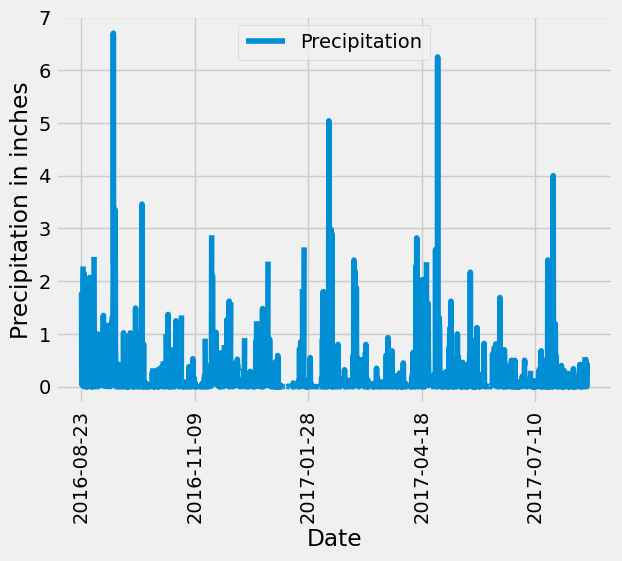

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.
last_data = dt.date(2017, 8, 23)-dt.timedelta(days=365)
last_data
#datetime.date(2016, 8, 23)


# Perform a query to retrieve the date and precipitation scores

prcp_query=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_data).all()

prcp_query

# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(prcp_query, columns = ["Date", "Precipitation"])
df = df.set_index("Date")
df.head()
# Sort the dataframe by date
df = df.sort_values("Date")
df.head()

# Use Pandas Plotting with Matplotlib to plot the data

df.plot(y="Precipitation", use_index=True, rot=90)
plt.xlabel("Date")
plt.ylabel("Precipitation in inches")
plt.show()


In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == "USC00519281").all()

[(54.0, 85.0, 71.66378066378067)]

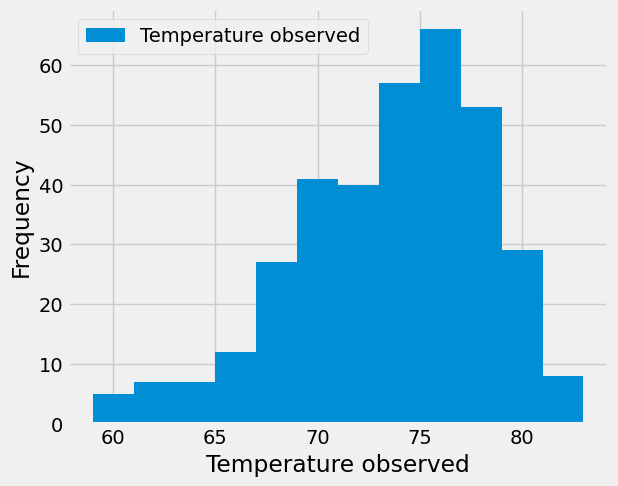

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

result = session.query(Measurement.tobs).filter(Measurement.station == "USC00519281").filter(Measurement.date >= last_data).all()

df2 = pd.DataFrame (result, columns = ["Temperature observed"])
df2.head()

df2.plot.hist(bins = 12)
plt.tight_layout()
plt.xlabel("Temperature observed")
plt.show()


# Close session

In [19]:
# Close Session
session.close()